### Date: 20/01/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)

# numpy version:  1.24.1
# pandas version:  1.5.2
# sklearn version:  1.2.0
# matplotlib version:  3.6.3

numpy version:  1.24.1
pandas version:  1.5.2
sklearn version:  1.2.0
matplotlib version:  3.6.3


In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

In [4]:
X.shape

(100, 1)

In [5]:
y

array([-3.43198806e+01, -9.42120961e+00, -1.90881877e+01,  2.04372122e+01,
        2.77559659e+01, -2.90750046e+00, -1.41987828e+01,  5.40025891e+00,
       -2.64264302e+01, -3.49067872e+01,  3.73362043e+01,  1.28532816e+01,
        2.50289888e+01, -1.89608736e+01, -2.34655852e+01,  3.77839324e+01,
        6.69670792e+00, -5.57201352e+00, -4.92158778e+01,  1.59474399e+01,
       -4.29667324e+01,  6.09015466e+00, -2.53194769e+01,  6.28216706e+01,
        1.24870400e+01, -3.27136530e+01, -1.88255476e+01, -2.93912926e+01,
       -2.86886731e+01,  4.38924069e+00,  4.63542396e+01,  2.43919519e+01,
        3.79848517e+01, -3.45767718e+01, -6.18736296e+01, -4.64421597e+01,
       -6.88808416e+00,  3.96988084e+01, -3.52373298e+01,  8.36850884e+00,
       -3.96814412e+01,  8.27318308e+00, -4.40722161e+00, -3.01350607e+00,
        5.78213629e+01,  2.46525603e+01,  1.81131707e+01, -5.22849035e+01,
        3.59187182e+01,  1.58411788e+01,  2.40080546e+01, -2.51245994e+01,
       -4.39284313e+01,  

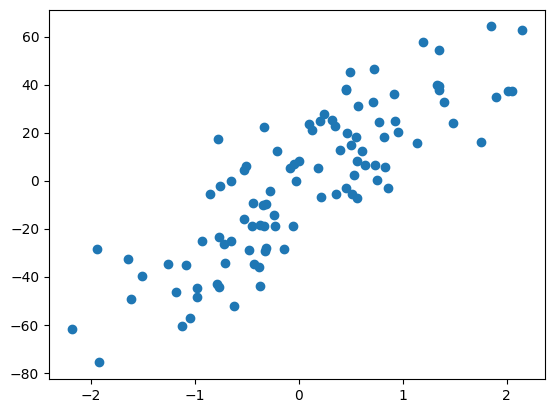

In [6]:
# let's plot the data distribuation

plt.scatter(x=X, y=y)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### For linear regression

In [8]:
# Let's create linear regression model

linear_model = LinearRegression()

In [9]:
linear_model.fit(X=X_train, y=y_train)

LinearRegression()

In [10]:
linear_model.coef_

array([26.62094169])

In [11]:
linear_model.intercept_

-3.282307599200508

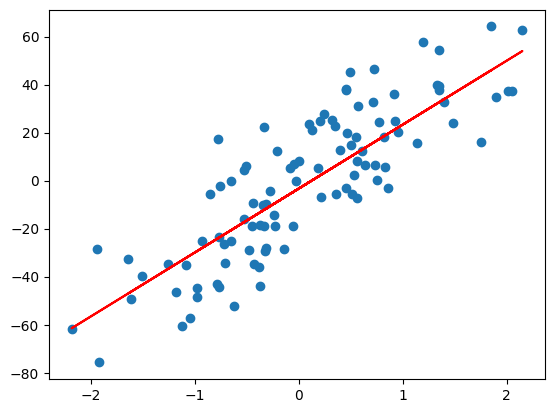

In [12]:
# plot the line for linear regression

plt.scatter(x=X, y=y)
plt.plot(X_test, linear_model.predict(X=X_test), color="red")
plt.show()

In [13]:
# Check r2socre

y_pred = linear_model.predict(X=X_test)
print(y_pred)

print("r2 score: ", r2_score(y_true=y_test, y_pred=y_pred))

[-13.51693321   0.1066256   -9.75988156  11.74932128  45.95612068
  18.83718347 -12.13845002 -10.68651035 -46.91651772   8.78120142
 -29.48159439 -14.72657275   5.16587281 -33.11125569 -61.50537576
  32.52556655 -20.78603644  53.96291199   9.11394612  21.27136219]
r2 score:  0.7607033878525122


### Let's write Batch Gradient descent algorithm for Linear Regression

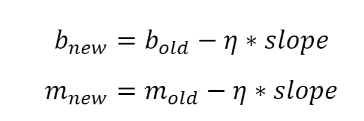
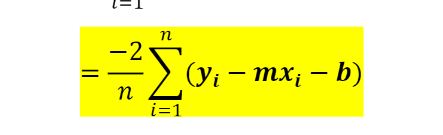
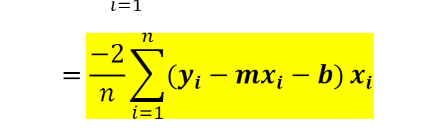

In [14]:
class GradientDescentRegressior:
    def __init__(self, learning_rate=0.01, epochs=100):
        # let's randomly assuem values of m and b
        self.m_ = np.random.randint(low=1, high=100)
        self.b_ = np.random.randint(low=1, high=100)
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        for i in range(self.epochs):
#             b_m_value = []
            # calculate slope of b and m
            slope_b = -2 * np.mean(y - (self.m_ * X.ravel()) - self.b_)
            slope_m = -2 * np.mean((y - (self.m_ * X.ravel()) - self.b_) * X.ravel()) # X.ravel() will make 1-d array
            
            # update the value of b and m
            self.b_ = self.b_ - (self.learning_rate * slope_b)
            self.m_ = self.m_ - (self.learning_rate * slope_m)
            
#             b_m_value.append({i:f"b:{self.b_}, m:{self.m_}"})
            
#             print(b_m_value)
    
    def predict(self, X):
        return (self.m_ * X.ravel()) + self.b_

In [15]:
obj = GradientDescentRegressior(learning_rate=0.1, epochs=100)

obj.fit(X=X_train, y=y_train)

In [16]:
obj.b_

-3.2823073782543637

In [17]:
obj.m_

26.62094095370768

In [18]:
# Check r2socre

y_pred2 = obj.predict(X=X_test)
print(y_pred2)

print("r2 score: ", r2_score(y_true=y_test, y_pred=y_pred2))

[-13.51693271   0.10662573  -9.75988116  11.74932108  45.95611953
  18.83718308 -12.13844955 -10.68650992 -46.9165163    8.78120131
 -29.48159344 -14.72657221   5.1658728  -33.11125464 -61.50537393
  32.52556578 -20.78603574  53.96291062   9.113946    21.27136173]
r2 score:  0.7607033836933823
